In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### 복습
1. csv 폴더에서 drinks.csv 파일을 로드 
2. 결측치를 확인 
3. 컬럼의 이름을 변경 -> ['국가', '맥주소비량', '증류주소비량', '와인소비량', '도수', '대륙']
4. 대륙 컬럼에 결측치가 존재 -> 결측치를 'OT'로 대체
5. 대륙별 맥주소비량의 평균, 최소, 최대, 합계 출력
6. 도수 컬럼의 평균보다 대륙별 도수의 평균이 높은 대륙을 출력

In [3]:
# 파일을 로드 
drinks = pd.read_csv('../../csv/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [4]:
# 결측치 확인 
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [6]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [9]:
drinks.loc[ drinks.isna().any(axis=1) ] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [11]:
# 컬럼의 이름을 변경 
drinks.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', '도수', '대륙']
drinks.head(1)

,국가,맥주소비량,증류주소비량,와인소비량,도수,대륙
0,Afghanistan,0,0,0,0.0,AS


In [12]:
# 결측치가 존재하고 해당하는 결측치를 'OT' 대체
drinks['대륙'] = drinks['대륙'].fillna('OT')

In [13]:
drinks.isna().sum()

국가        0
맥주소비량     0
증류주소비량    0
와인소비량     0
도수        0
대륙        0
dtype: int64

In [22]:
# 대륙별로 그룹화 맥주소비량의 평균, 최소, 최대, 합계
drinks[ ['맥주소비량', '대륙'] ].groupby(['대륙']).sum()
drinks[ ['맥주소비량', '대륙'] ].groupby(['대륙']).describe()

group_data = drinks[ ['맥주소비량', '대륙'] ].groupby(['대륙']).agg(['min', 'max', 'mean', 'sum'])

In [27]:
group_data['맥주소비량']['mean']

대륙
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: mean, dtype: float64

In [30]:
# 전체 데이터에서 도수 컬럼의 평균
mean_data = drinks['도수'].mean()

In [32]:
group_data2 = drinks[['대륙', '도수']].groupby(['대륙']).mean()

In [37]:
group_data2.loc[ group_data2['도수'] > mean_data ]

,도수
대륙,
EU,8.617778
OT,5.995652
SA,6.308333


In [38]:
## 과연 우리나라는 술 소비량이 몇위일까?
## 가장 술 소비량이 많은 국가는 어디인가?


# 총술소비량 컬럼을 생성 -> 맥주소비량 + 증류주소비량 + 와인소비량 
# 총술소비량 내림차순 정렬 
# 인덱스를 초기화(기존의 인덱스는 제거)

drinks['총술소비량'] = drinks['맥주소비량'] + drinks['증류주소비량'] + drinks['와인소비량']

drinks.head()

,국가,맥주소비량,증류주소비량,와인소비량,도수,대륙,총술소비량
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [40]:
drinks.sort_values('총술소비량', ascending= False, inplace=True)

In [42]:
drinks.reset_index(drop=True, inplace=True)

In [43]:
drinks.head(10)

,국가,맥주소비량,증류주소비량,와인소비량,도수,대륙,총술소비량
0,Andorra,245,138,312,12.4,EU,695
1,Grenada,199,438,28,11.9,OT,665
2,Czech Republic,361,170,134,11.8,EU,665
3,France,127,151,370,11.8,EU,648
4,Russian Federation,247,326,73,11.5,AS,646
5,Lithuania,343,244,56,12.9,EU,643
6,Luxembourg,236,133,271,11.4,EU,640
7,Germany,346,117,175,11.3,EU,638
8,Hungary,234,215,185,11.3,EU,634
9,Poland,343,215,56,10.9,EU,614


In [44]:
drinks.loc[ drinks['국가'] == 'South Korea' ]

,국가,맥주소비량,증류주소비량,와인소비량,도수,대륙,총술소비량
98,South Korea,140,16,9,9.8,AS,165


In [45]:
drinks.loc[ drinks['국가'] == 'North Korea']

,국가,맥주소비량,증류주소비량,와인소비량,도수,대륙,총술소비량
180,North Korea,0,0,0,0.0,AS,0


c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1439: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:833: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


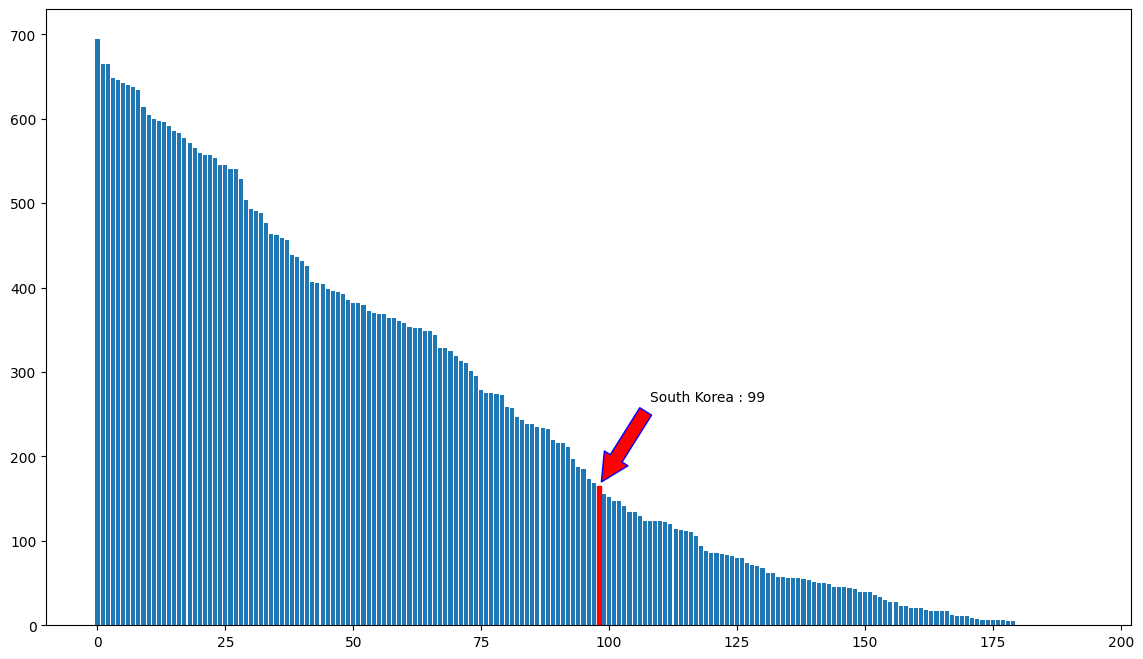

In [60]:
## 총술소비량 바형 그래프로 시각화 

x = drinks.index
y = drinks['총술소비량']

# South Korea의 인덱스 값 
korea_index = drinks.loc[drinks['국가'] == 'South Korea'].index[0]
# South Korea의 총술소비량 
korea_total = drinks.loc[drinks['국가']=='South Korea', '총술소비량']


plt.figure(figsize=(14, 8))
bar_list = plt.bar(x, y)
# South Korea데이터의 막대의 색을 변경
bar_list[korea_index].set_color('r')

# 그래프에 주석을 추가 
plt.annotate(
    'South Korea : '+ str( korea_index+1 ), 
    xytext= (korea_index + 10, korea_total + 100), 
    xy = (korea_index, korea_total), 
    arrowprops=  dict(
        facecolor = 'r', # 화살표 내부의 색을 지정 
        edgecolor = 'b', # 선의 색을 지정
        headwidth = 20, # 화살표 머리의 너비 
        headlength = 20, # 화살표 머리의 길이
        width = 10, # 화살표 꼬리의 너비 
        shrink = 0.05 # 화살표와 주석 사이의 거리 
    )
)

# plt.xticks(rotation = 90)
plt.show()

In [65]:
## 가장 독한 술을 먹는 국가는 어디인가?
## 도수 기준으로 내림차순 정렬 
## 바형 그래프 표시 
## South Korea의 막대를 주석처리 표시 
drinks2 = drinks.sort_values('도수', ascending=False)
drinks2.reset_index(drop=True, inplace=True)

In [77]:
drinks2.head()

,국가,맥주소비량,증류주소비량,와인소비량,도수,대륙,총술소비량
0,Belarus,142,373,42,14.4,EU,557
1,Lithuania,343,244,56,12.9,EU,643
2,Andorra,245,138,312,12.4,EU,695
3,Grenada,199,438,28,11.9,OT,665
4,France,127,151,370,11.8,EU,648


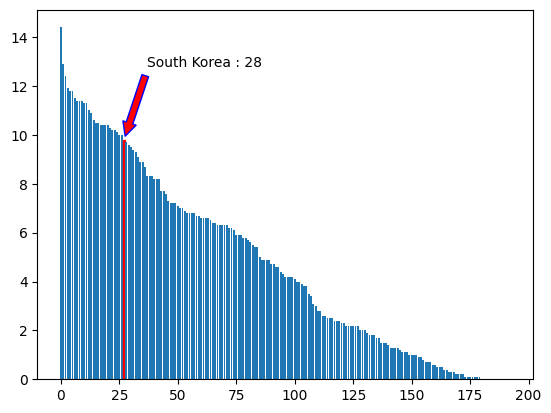

In [76]:
x = drinks2.index
y = drinks2['도수']

korea_index = drinks2.loc[ drinks2['국가'] == "South Korea" ].index[0]
korea_total = drinks2.loc[ drinks2['국가'] == 'South Korea', '도수' ]
# print(korea_index, korea_total)
bar_list = plt.bar(x, y)
bar_list[korea_index].set_color('r')

# 그래프에 주석을 추가 
plt.annotate(
    'South Korea : '+ str( korea_index+1 ), 
    xytext= (korea_index + 10, korea_total + 3), 
    xy = (korea_index, korea_total), 
    arrowprops=  dict(
        facecolor = 'r', # 화살표 내부의 색을 지정 
        edgecolor = 'b', # 선의 색을 지정
        headwidth = 10, # 화살표 머리의 너비 
        headlength = 10, # 화살표 머리의 길이
        width = 5, # 화살표 꼬리의 너비 
        shrink = 0.05 # 화살표와 주석 사이의 거리 
    )
)

plt.show()